## Summary

**New mehtod**: RAG details and visualize.

**Papers**:

Automated Fact-Checking of Climate Change Claims with Large Language Models (23 Jan 2024) https://arxiv.org/abs/2401.12566

Radiology-GPT: A Large Language Model for Radiology (14 Jun 2023) https://arxiv.org/abs/2306.08666



(2.6)Papers: 

ClimateBert: A Pretrained Language Model for Climate-Related Text (22 Oct 2021) https://arxiv.org/abs/2110.12010

Retrieval-Augmented Generation for Knowledge-Intensive NLP Tasks (22 May 2020) https://arxiv.org/abs/2005.11401

Query Expansion by Prompting Large Language Models (5 May 2023) https://arxiv.org/abs/2305.03653

PLLaMa: An Open-source Large Language Model for Plant Science (3 Jan 2024) https://arxiv.org/abs/2401.01600

GenCast: Diffusion-based ensemble forecasting for medium-range weather (25 Dec 2023) https://arxiv.org/abs/2312.15796


Google docs:

Q1.5: "Have emissions reductions fallen for some countries?"

Q2.2: "Is it possible the Arctic will become ice free at some points before 2050?"

https://docs.google.com/document/d/1HGypipUiT0u045w-9PcUgCWJAXOX4fqpFQNKhjiG6ys/edit?usp=sharing

All question: https://docs.google.com/document/d/1AEu75SflCQhwFmI4dBdG58RIPq7hzhkN6ip9h19dv0o/edit?usp=sharing



(1.31)New model: [Bard(Original)](https://bard.google.com/chat) For 13 questions from paper, [13 answers](https://g.co/bard/share/117570e457af) For 7 new questions, [7 answers](https://g.co/bard/share/644ebd6a4f50) API [Join Waitlist](https://cloud.google.com/ai/earlyaccess/join?hl=en)

(1.22) View the all [answers](yl_Appendix.ipynb).

(1.16) 7 questions:

1. What is the best estimate of the equilibrium climate sensitivity?
2. Is it possible the Arctic will become ice free at some points before 2050?
3. How likely will the world see runaway ice loss from the Antarctic  ice sheets by 2100?
4. To what extent has climate change impacted ice sheets in both polar regions?
5. Will coastal New York see the impact of Greenland ice sheet melting by 2100?
6. What will be the likely changes to weather and climate extremes in coastal New York around 2050 if the world take no action to reduce greenhouse gas emissions?
7. What are the primary evidence and how robust is it that human activities caused the observed global warming since the pre-industrial period?

The 13 original questions are from [chatClimate: Grounding Conversational AI in Climate Science](https://arxiv.org/abs/2304.05510)



The Climate report is from [IPCC_AR6_WGIII_FullReport](https://sdgs.un.org/sites/default/files/2023-01/IPCC_AR6_WGIII_FullReport.pdf)

(1.2)The Llama2(Original), ChatGPT-4(Original), Llama2+(Climate report) and Llama2 hybird code parts are available [here](https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/yl_Climate_0102.ipynb).


(2023.12.18)The Llama2(Original) and Llama2+(Climate report) code parts are available [here](https://github.com/yl1127/Academic-projects/blob/main/yl_Climate_LLM/yl_LlamaCloud_Climate.ipynb).


<!-- | Rate | Llama2(Original) | GPT-4(Original) | Llama2 +(Climate report)|Llama2 hybird|
| ----------- | ----------- |------------------|-------------------------|-----------------------|
|Q1: What is the best estimate of the equilibrium climate sensitivity?| -- | -- | -- |  --|
|Q2: Is it possible the Arctic will become ice free at some points before 2050?| -- | -- | -- |  --|
|Q3: How likely will the world see runaway ice loss from the Antarctic  ice sheets by 2100?| -- | -- | -- |  --|
|Q4: To what extent has climate change impacted ice sheets in both polar regions?| -- | -- | -- |  --|
|Q5: Will coastal New York see the impact of Greenland ice sheet melting by 2100?| -- | -- | -- |  --|
|Q6: What will be the likely changes to weather and climate extremes in coastal New York around 2050 if the world take no action to reduce greenhouse gas emissions?| -- | -- | -- |  --|
|Q7: What are the primary evidence and how robust is it that human activities caused the observed global warming since the pre-industrial period?| -- | -- | -- |  --| -->

## This demo app shows:
* How to run Llama2 in the cloud hosted on Replicate
* How to use LangChain to ask Llama general questions and follow up questions
* How to use LangChain to load a recent PDF doc - This is the well known RAG (Retrieval Augmented Generation) method to let LLM such as Llama2 be able to answer questions about the data not publicly available when Llama2 was trained, or about your own data. RAG is one way to prevent LLM's hallucination
* How to use LangChain to load a directory which includes multiple PDF docs.
* You should also review the [HelloLlamaLocal](HelloLlamaLocal.ipynb) notebook for more information on RAG

**Note** We will be using Replicate to run the examples here. You will need to first sign in with Replicate with your github account, then create a free API token [here](https://replicate.com/account/api-tokens) that you can use for a while. 
After the free trial ends, you will need to enter billing info to continue to use Llama2 hosted on Replicate.

Let's start by installing the necessary packages:
- sentence-transformers for text embeddings
- chromadb gives us database capabilities 
- langchain provides necessary RAG tools for this demo

And setting up the Replicate token.

### How to run original Llama2?

In [1]:
# !pip install langchain replicate sentence-transformers chromadb pypdf

In [2]:
# Apply and enter API for Llama2
from getpass import getpass
import os

REPLICATE_API_TOKEN = getpass()
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN


 ········


Next we call the ChatGPT model from OpenAI. In this example we will use the ChatGPT-3.5-turbo chat model. You can find more ChatGPT models by searching for them on the [OpenAI API keys](https://platform.openai.com/api-keys).


In [35]:
# OpenAI API
import os
import openai
from openai import OpenAI

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
new_api_key = getpass()

os.environ["OPENAI_API_KEY"] = new_api_key
openai.api_key = os.environ['OPENAI_API_KEY']

openai_client = OpenAI()

 ········


In [4]:
# !pip install OpenAI
# !pip install typing-extensions --upgrade

In [5]:
from langchain.llms import Replicate
from IPython.display import display, Markdown

llama2_13b = "meta/llama-2-13b-chat:f4e2de70d66816a838a89eeeb621910adffb0dd0baba3976c96980970978018d"
llama2_70b = "meta/llama-2-70b-chat:02e509c789964a7ea8736978a43525956ef40397be9033abf9fd2badfe68c9e3"
# llm = Replicate(
#     model=llama2_13b,
#     model_kwargs={'prompt': f"{string_dialogue} {question} Assistant: ", "temperature": 0.01, "top_p": 1, "max_new_tokens":5000},
#     # max_tokens = 2000,
#     # n_ctx=4000,
# )

In [6]:
import langchain
langchain.debug = False

def get_llm(question):
    input_prompt = {
    "system": {
        "content": "You are Q&A bot. A highly intelligent system that answers user questions"
    },
    "role": "user",
    "content": question
    }

    llm = Replicate(
        model=llama2_13b,
        # model = llama2_70b,
        model_kwargs={'prompts': f"{input_prompt}", "temperature": 0.01, "top_p": 1, "max_new_tokens":5000},
        # max_tokens = 2000,
        # n_ctx=4000,
    )
    return llm(question)

With the model set up, you are now ready to ask some questions. Here is an example of the simplest way to ask the model some general questions.

### How to load an external PDF and do embedding?

In [7]:
# !pip install pypdf

In [9]:
# from langchain.document_loaders import PyPDFLoader
from pypdf import PdfReader
loader = PdfReader("IPCC_AR6_WGIII_FullReport.pdf")
# docs = loader.load()
pdf_texts = [p.extract_text().strip() for p in loader.pages]
pdf_texts = [text for text in pdf_texts if text]
print(pdf_texts[0])

Working Group III contribution to the
Sixth Assessment Report of the 
Intergovernmental Panel on Climate ChangeWGIIIMitigation of Climate ChangeClimate Change 2022


In [10]:
# check docs length and content
# print(len(docs), docs[0].page_content[0:300])
# print(docs[100])
print(len(pdf_texts))
print(pdf_texts[1])

2030
Front cover photograph: Matt Bridgestock, Director and Architect at John Gilbert Architects
All International Energy Agency (IEA) Data, IEA Further Data and Derived Data has been  
sourced from https://www.iea.org/data-and-statistics.
© 2022 Intergovernmental Panel on Climate Change.
Electronic copies of this Summary for Policymakers are available from the IPCC website www.ipcc.ch
ISBN 978-92-9169-160-9


We need to store our documents. There are more than 30 vector stores (DBs) supported by LangChain. 
For this example we will use [Chroma](https://python.langchain.com/docs/integrations/vectorstores/chroma) which is light-weight and in memory so it's easy to get started with.
For other vector stores especially if you need to store a large amount of data - see https://python.langchain.com/docs/integrations/vectorstores

We will also import the HuggingFaceEmbeddings and RecursiveCharacterTextSplitter to assist in storing the documents.

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter


In [12]:
character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=20
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(character_split_texts[10])
print(f"\nTotal chunks: {len(character_split_texts)}")

approaches falling outside the scope of individual sectors. 
As in the AR5, there is a chapter on recent trends and drivers, with 
the scope expanded to cover historic emissions and recent policy 
developments. Following the pattern established in the WG III AR5 
report, and the Special Report on Global Warming of 1.5°C, this 
report assesses published emission scenarios with a 21st century 
perspective. Modelled emission scenarios are categorised according 
to climate outcomes, allowing a handshake with the WG I assessment. 
To meet the goal of linking top-down and bottom-up insights, the 
report includes an additional pathways chapter that provides a mid-
century perspective, focussing on national and regional scales and the 
alignment between development pathways and mitigation actions.
As in the AR5, this report addresses mitigation enablers such as 
international cooperation, finance and investment, and policies and

Total chunks: 13302


To store the documents, we will need to split them into chunks using [`RecursiveCharacterTextSplitter`](https://python.langchain.com/docs/modules/data_connection/document_transformers/text_splitters/recursive_text_splitter) and create vector representations of these chunks using [`HuggingFaceEmbeddings`](https://www.google.com/search?q=langchain+hugging+face+embeddings&sca_esv=572890011&ei=ARUoZaH4LuumptQP48ah2Ac&oq=langchian+hugg&gs_lp=Egxnd3Mtd2l6LXNlcnAiDmxhbmdjaGlhbiBodWdnKgIIADIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCkjeHlC5Cli5D3ABeAGQAQCYAV6gAb4CqgEBNLgBAcgBAPgBAcICChAAGEcY1gQYsAPiAwQYACBBiAYBkAYI&sclient=gws-wiz-serp) on them before storing them into our vector database. 

In general, you should use larger chuck sizes for highly structured text such as code and smaller size for less structured text. You may need to experiment with different chunk sizes and overlap values to find out the best numbers.

In [13]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()
print(embedding_function([character_split_texts[10]]))

[[-0.0008131897775456309, 0.005816067568957806, 0.07490230351686478, 0.06837400794029236, 0.08766964823007584, -0.0012497920542955399, -0.0640428364276886, -0.041942812502384186, -0.07316127419471741, 0.01825740560889244, -0.08234508335590363, -0.05028411000967026, -0.03627554699778557, 0.057594843208789825, -0.026721015572547913, 0.020879218354821205, -0.11043477058410645, -0.0446099191904068, -0.06738457083702087, -0.09205488860607147, 0.025163700804114342, 0.053215134888887405, 0.034258224070072174, -0.010387456975877285, 0.018884461373090744, -0.05462275445461273, -0.025599760934710503, 0.023365968838334084, -0.06750442087650299, 0.08059892803430557, 0.0327172689139843, 0.08507392555475235, -0.0669960305094719, -0.016989467665553093, 0.02977531962096691, 0.0656718760728836, 0.03229948505759239, 0.01954924501478672, 0.03471197932958603, 0.004731947090476751, 0.034873683005571365, -0.08469009399414062, 0.0052584330551326275, -0.05337139219045639, -0.03895178809762001, 0.0231067351996

In [14]:
chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("IPCC_AR6_WGIII_FullReport.pdf", embedding_function=embedding_function)

ids = [str(i) for i in range(len(character_split_texts))]

chroma_collection.add(ids=ids, documents=character_split_texts)
chroma_collection.count()

13302

In [15]:
question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "Is it still possible to limit warming to 1.5°C?" #Q1

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

for document in retrieved_documents:
    print(document)
    print('\n')

agricultural markets and food security (Havlík et al. 2014; Hasegawa 
et al. 2018; Doelman et al. 2019; Fujimori et al. 2019). Mitigation 
policies aimed at achieving  1.5°C–2°C, if not managed properly, Box 3.6 (continued)
20
051015tCO2-eq yr–1
2030 2050
YearC1: limit warming 
to 1.5°C (>50%) 
with no or limited 
overshoot
C2: return 
warming to 1.5°C 
(>50%) after a 
high overshoot
C3: limit warming 
to 2°C (>67%)
C4: limit warming 
to 2°C (>50%)
C5: limit warming 
to 2.5°C (>50%)
C6: limit warming 
to 3°C (>50%)
C7: limit warming 
to 4°C (>50%)
C8: exceed 
warming of 4°C 
(≥50%)
Box 3.6, Figure 1 | Difference in per-capita emissions of Kyoto gases between the highest emitting and the lowest emitting of the 10 regions, 
in 2030 and 2050, by temperature category of pathways.
Through avoiding impacts of climate change, which fall more heavily on low-income countries, communities and households, and 
exacerbate poverty, mitigation reduces inequalities and poverty (Section 3.6.4.2).


of

### How to visualize the Embedding space?

In [28]:
from helper_utils import word_wrap
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

embedding_function = SentenceTransformerEmbeddingFunction()

# chroma_collection = load_chroma(filename='microsoft_annual_report_2022.pdf', collection_name='microsoft_annual_report_2022', embedding_function=embedding_function)
chroma_collection.count()

13302

In [ ]:
# !pip install umap
# !pip install umap-learn
# !pip install numpy scipy
# !pip install scikit-learn
# !pip install numba
# !pip install umap-learn
# !pip install tensorflow
# !pip install pynndescent
# !pip install umap-learn

In [22]:
import umap
# from umap import UMAP
# from umap import umap_ as UMAP
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

/Users/ylpan/anaconda3/envs/llama-demo-apps/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [23]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings   

In [24]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 13302/13302 [1:07:17<00:00,  3.29it/s]


(2.514010286331177, 15.710518026351929, -3.671162819862366, 6.3194434404373165)

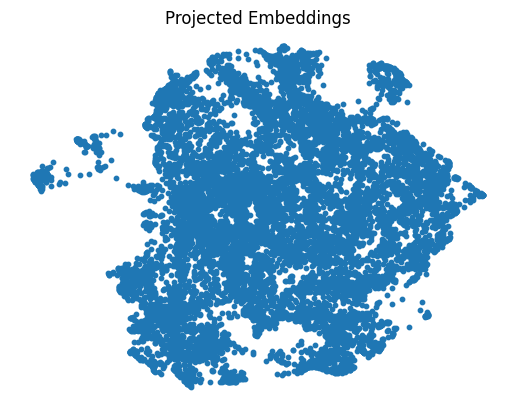

In [25]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

In [30]:
## Relevancy and Distraction

query = "Is it still possible to limit warming to 1.5°C?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

agricultural markets and food security (Havlík et al. 2014; Hasegawa 
et al. 2018; Doelman et al. 2019; Fujimori et al. 2019). Mitigation 
policies aimed at achieving  1.5°C–2°C, if not managed properly, Box 3.6 (continued)
20
051015tCO2-eq yr–1
2030 2050
YearC1: limit warming 
to 1.5°C (>50%) 
with no or limited 
overshoot
C2: return 
warming to 1.5°C 
(>50%) after a 
high overshoot
C3: limit warming 
to 2°C (>67%)
C4: limit warming 
to 2°C (>50%)
C5: limit warming 
to 2.5°C (>50%)
C6: limit warming 
to 3°C (>50%)
C7: limit warming 
to 4°C (>50%)
C8: exceed 
warming of 4°C 
(≥50%)
Box 3.6, Figure 1 | Difference in per-capita emissions of Kyoto gases between the highest emitting and the lowest emitting of the 10 regions, 
in 2030 and 2050, by temperature category of pathways.
Through avoiding impacts of climate change, which fall more heavily on low-income countries, communities and households, and 
exacerbate poverty, mitigation reduces inequalities and poverty (Section 3.6.4.2).

of 

In [31]:
query_embedding = embedding_function([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.39it/s]


(2.514010286331177, 15.710518026351929, -3.671162819862366, 6.3194434404373165)

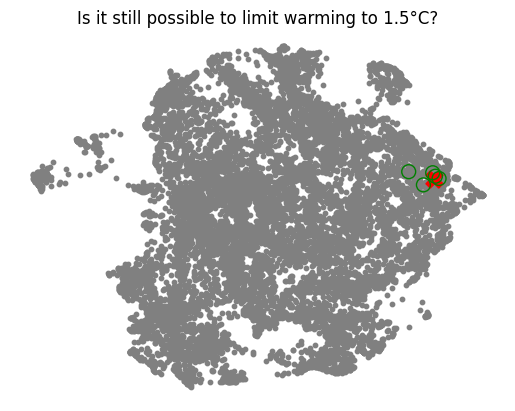

In [32]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

### How to use LLM to enhance query?

Expansion with generated answers https://arxiv.org/abs/2305.03653

In [36]:
def augment_query_generated(query, model="gpt-3.5-turbo"):
    messages = [
        {
            "role": "system",
            "content": "You are a helpful expert financial research assistant. Provide an example answer to the given question, that might be found in a document like an annual report. "
        },
        {"role": "user", "content": query}
    ] 

    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content

In [38]:
original_query = "Is it still possible to limit warming to 1.5°C?"
hypothetical_answer = augment_query_generated(original_query)

joint_query = f"{original_query} {hypothetical_answer}"
print(joint_query)

Is it still possible to limit warming to 1.5°C? According to our analysis, limiting global warming to 1.5°C above pre-industrial levels is still technically possible, but will require rapid and unprecedented changes across all sectors of the economy. Achieving this goal would require significant reductions in greenhouse gas emissions, transitioning to low-carbon energy sources, implementing sustainable land-use practices, and adopting climate-resilient infrastructure. The Intergovernmental Panel on Climate Change (IPCC) has identified several pathways that could limit warming to 1.5°C, but they all require immediate and substantial action to achieve. It is important to note that the window of opportunity to limit warming to 1.5°C is closing rapidly, and further delays in taking ambitious climate action could significantly increase the risks and impacts of climate change.


In [39]:
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results['documents'][0]

for doc in retrieved_documents:
    print(doc)
    print('')

Policy, 124, 95–101, doi:10.1016/j.enpol.2018.07.012.
Rogelj, J., D.  Shindell, K.  Jiang, S.  Fifita, P .  Forster, V.  Ginzburg, C.  Handa, 
H.  Kheshgi, S.  Kobayashi, E.  Kriegler, L.  Mundaca, R.  Séférian, and 
M.V. Vilariño, 2018: Mitigation pathways compatible with 1.5°C in the 
context of sustainable development. In: Global Warming of 1.5°C an 
IPCC special report on the impacts of global warming of 1.5°C above pre-
industrial levels and related global greenhouse gas emission pathways, 
in the context of strengthening the global response to the threat of 
climate change, sustainable development, and efforts to eradicate 
poverty [Masson-Delmotte, V., P .  Zhai, H.-O.  Pörtner, D.  Roberts, J.  Skea, 
P .R. Shukla, A. Pirani, W. Moufouma-Okia, C. Péan, R. Pidcock, S. Connors, 
J.B.R.  Matthews, Y .  Chen, X.  Zhou, M.I.  Gomis, E.  Lonnoy, T.  Maycock, 
M. Tignor, and T. Waterfield (eds.)], Cambridge University Press, Cambridge, 
UK and New York, NY , USA, pp. 93–174.

Rogelj, 

In [40]:
retrieved_embeddings = results['embeddings'][0]
original_query_embedding = embedding_function([original_query])
augmented_query_embedding = embedding_function([joint_query])

projected_original_query_embedding = project_embeddings(original_query_embedding, umap_transform)
projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.48it/s]


(2.514010286331177, 15.710518026351929, -3.671162819862366, 6.3194434404373165)

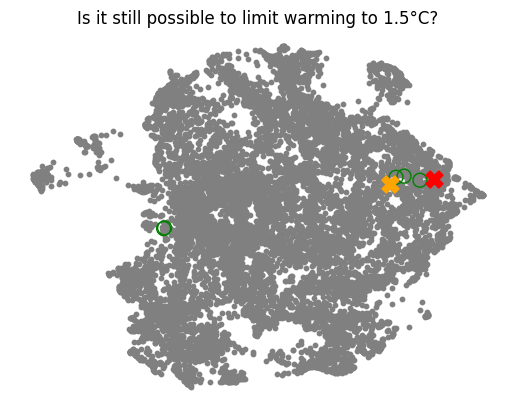

In [41]:
import matplotlib.pyplot as plt

# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{original_query}')
plt.axis('off')

### How to run ChatGPT-3.5 + pdf (chatClimate)?

We then use `RetrievalQA` to retrieve the documents from the vector database and give the model more context on Llama 2, thereby increasing its knowledge.

For each question, LangChain performs a semantic similarity search of it in the vector db, then passes the search results as the context to Llama to answer the question.

In [ ]:
# use LangChain's RetrievalQA, to associate Llama with the loaded documents stored in the vector db
from langchain.chains import RetrievalQA
import langchain
langchain.debug = True

def get_chatclimate(query, retrieved_documents, model="gpt-3.5-turbo"):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are a Q&A bot, an intelligent system that answers user questions ONLY based on the information provided by the user. If you use user information, please indicate the Page and Reference, which are provided below each piece of information. If the information cannot be found in the information provided by the user, please say ’I don’t know’"
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content


In [ ]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "Is it still possible to limit warming to 1.5°C?" #Q1

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

# for document in retrieved_documents:
#     print(document)
#     print('\n')

output = get_chatclimate(query=query, retrieved_documents=retrieved_documents)

print(output)

### How to run ChatGPT-3.5 hybrid chatClimate

In [42]:
question = "Is it still possible to limit warming to 1.5°C?" #Q1

print(joint_query)

def get_hybrid(query, retrieved_documents, model="gpt-3.5-turbo"):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are a Q&A bot, an intelligent system that answers user questions based on the information provided by the user above the question and your in-house knowledge. There are 5 pieces of extra information above the user question. please indicate the Page and Reference, which are provided below each piece of information. Additionally, let us know which part of your answer is from the IPCC information and which part is based on your in-house knowledge by writing either (IPCC AR6) or (Inhouse knowledge). If the information cannot be found in the information provided by the user or your in-house knowledge, please say ’I don’t know’."
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content



Is it still possible to limit warming to 1.5°C? According to our analysis, limiting global warming to 1.5°C above pre-industrial levels is still technically possible, but will require rapid and unprecedented changes across all sectors of the economy. Achieving this goal would require significant reductions in greenhouse gas emissions, transitioning to low-carbon energy sources, implementing sustainable land-use practices, and adopting climate-resilient infrastructure. The Intergovernmental Panel on Climate Change (IPCC) has identified several pathways that could limit warming to 1.5°C, but they all require immediate and substantial action to achieve. It is important to note that the window of opportunity to limit warming to 1.5°C is closing rapidly, and further delays in taking ambitious climate action could significantly increase the risks and impacts of climate change.


In [45]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "Is it still possible to limit warming to 1.5°C?" #Q1

# query = joint_query

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

# for document in retrieved_documents:
#     print(document)
#     print('\n')

output = get_hybrid(query=query, retrieved_documents=retrieved_documents)

print(output)

Based on the information provided, it is still possible to limit warming to 1.5°C. Category C1 scenarios, which comprise modelled scenarios that limit warming to 1.5°C in 2100 with a likelihood of greater than 50% and reach or exceed warming of 1.5°C during the 21st century with a likelihood of 67% or less, can achieve this goal. These scenarios are referred to as scenarios that limit warming to 1.5°C (>50%) with no or limited overshoot. Limited overshoot refers to exceeding 1.5°C global warming by up to about 0.1°C and for up to several decades (IPCC AR6).

It is important to note that there are still obstacles to be overcome in achieving deeper mitigation and there is evidence of progress towards deeper mitigation in various sectors. However, there are challenges that persist (IPCC AR6).


### How does ChatGPT-4 answer?
[https://chat.openai.com/share/17cf5cc6-50db-4547-a56f-18756a974622](https://chat.openai.com/share/17cf5cc6-50db-4547-a56f-18756a974622)


In [ ]:
def get_ChatGPT(query, model="gpt-4"):
    # information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are Q&A bot. A highly intelligent system that answers user questions"
        },
        {"role": "user", "content": f"Question: {query}."}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content

In [ ]:
query = "Is it still possible to limit warming to 1.5°C?" #Q1
output = get_ChatGPT(query=query)

print(output)

### How to run ChatGPT-4+pdf(chatClimate)?

In [ ]:
question = "Is it still possible to limit warming to 1.5°C?" #Q1

# use LangChain's RetrievalQA, to associate Llama with the loaded documents stored in the vector db
from langchain.chains import RetrievalQA

def get_chatclimate(query, retrieved_documents, model="gpt-4"):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are a Q&A bot, an intelligent system that answers user questions ONLY based on the information provided by the user. If you use user information, please indicate the Page and Reference, which are provided below each piece of information. If the information cannot be found in the information provided by the user, please say ’I don’t know’"
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content
    

In [ ]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "Is it still possible to limit warming to 1.5°C?" #Q1

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

# for document in retrieved_documents:
#     print(document)
#     print('\n')

output = get_chatclimate(query=query, retrieved_documents=retrieved_documents)

print(output)

### How to run ChatGPT-4 hybird chatClimate?

In [ ]:
question = "Is it still possible to limit warming to 1.5°C?" #Q1

from langchain.chains import RetrievalQA

def get_hybrid(query, retrieved_documents, model="gpt-4"):
    information = "\n\n".join(retrieved_documents)

    messages = [
        {
            "role": "system",
            "content": "You are a Q&A bot, an intelligent system that answers user questions based on the information provided by the user above the question and your in-house knowledge. There are 5 pieces of extra information above the user question. please indicate the Page and Reference, which are provided below each piece of information. Additionally, let us know which part of your answer is from the IPCC information and which part is based on your in-house knowledge by writing either (IPCC AR6) or (Inhouse knowledge). If the information cannot be found in the information provided by the user or your in-house knowledge, please say ’I don’t know’."
        },
        {"role": "user", "content": f"Question: {query}. \n Information: {information}"}
    ]
    
    response = openai_client.chat.completions.create(
        model=model,
        messages=messages,
    )
    content = response.choices[0].message.content
    return content



In [ ]:
# question = "Is it still possible to limit warming to 1.5°C?" #Q1
query = "Is it still possible to limit warming to 1.5°C?" #Q1

results = chroma_collection.query(query_texts=[query], n_results=5)
retrieved_documents = results['documents'][0]

# for document in retrieved_documents:
#     print(document)
#     print('\n')

output = get_hybrid(query=query, retrieved_documents=retrieved_documents)

print(output)

### How to load multiple PDFs?

We will use PyPDF Directory to load PDFs from directory.

In [ ]:
from langchain.document_loaders import PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader("yl_External_PDFs/")
docs = loader.load()

In [ ]:
# check docs length and content
print(len(docs), docs[0].page_content[0:300])

To store the documents, we will need to split them into chunks using [`RecursiveCharacterTextSplitter`](https://python.langchain.com/docs/modules/data_connection/document_transformers/text_splitters/recursive_text_splitter) and create vector representations of these chunks using [`HuggingFaceEmbeddings`](https://www.google.com/search?q=langchain+hugging+face+embeddings&sca_esv=572890011&ei=ARUoZaH4LuumptQP48ah2Ac&oq=langchian+hugg&gs_lp=Egxnd3Mtd2l6LXNlcnAiDmxhbmdjaGlhbiBodWdnKgIIADIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCjIHEAAYgAQYCkjeHlC5Cli5D3ABeAGQAQCYAV6gAb4CqgEBNLgBAcgBAPgBAcICChAAGEcY1gQYsAPiAwQYACBBiAYBkAYI&sclient=gws-wiz-serp) on them before storing them into our vector database. 

In general, you should use larger chuck sizes for highly structured text such as code and smaller size for less structured text. You may need to experiment with different chunk sizes and overlap values to find out the best numbers.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20)
all_splits = text_splitter.split_documents(docs)

# create the vector db to store all the split chunks as embeddings
embeddings = HuggingFaceEmbeddings()
vectordb = Chroma.from_documents(
    documents=all_splits,
    embedding=embeddings,
) 
# slow 
# about 30 mins

We then use ` RetrievalQA` to retrieve the documents from the vector database and give the model more context on Llama 2, thereby increasing its knowledge.

For each question, LangChain performs a semantic similarity search of it in the vector db, then passes the search results as the context to Llama to answer the question.